<a href="https://colab.research.google.com/github/BrendaG04/Google1D/blob/main/notebooks/JP_Notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%pip install pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis (EDA) Plan for YouTube Trending Dataset
This notebook will guide through a structured EDA process for the YouTube trending dataset. The main steps include:
1. **Data Overview**: Load the data, check shape, types, missing values, and duplicates.
2. **Feature Understanding**: Review columns, unique values, and data types.
3. **Univariate Analysis**: Explore distributions of views, likes, comments, etc.
4. **Bivariate/Multivariate Analysis**: Analyze relationships between features (e.g., views vs. likes).
5. **Temporal Analysis**: Explore trends by publish time, trending time, etc.
6. **Text Analysis**: Analyze titles, tags, and descriptions for patterns.
7. **Outlier Detection**: Identify videos with extreme values.
8. **Summary**: Capture key findings and insights.

In [2]:
# Data Overview and Centralized Data Cleaning for the Youtube Trending Dataset
import pandas as pd

# Load the dataset
youtube_data_JP = pd.read_csv('../datasets/JP_youtube_trending_data.csv')

# --- CENTRALIZED DATA CLEANING --- #
# Remove duplicate rows
youtube_data_clean_JP = youtube_data_JP.drop_duplicates().copy()
# Fill missing values in 'description' with an empty string (most relevant missing col)
if 'description' in youtube_data_clean_JP.columns:
    youtube_data_clean_JP['description'] = youtube_data_clean_JP['description'].fillna('')

# After cleaning, show shape, types, missing values, and check that cleaning is successful
print("Shape after duplicate removal:", youtube_data_clean_JP.shape)
print("Data Types (first 10 columns):\n", youtube_data_clean_JP.dtypes.head(10))
print("Missing Values in numerical/target columns:\n", youtube_data_clean_JP[['view_count', 'likes', 'dislikes', 'comment_count']].isnull().sum())
print("Duplicate Rows Remaining:", youtube_data_clean_JP.duplicated().sum())
# Show first 3 rows of cleaned data to confirm
print("\nSample of cleaned data:")
display(youtube_data_clean_JP.head(3))

# This clean dataframe (youtube_data_clean_JP) will be used for all further modeling and analysis steps.

Shape after duplicate removal: (268629, 16)
Data Types (first 10 columns):
 video_id         object
title            object
publishedAt      object
channelId        object
channelTitle     object
categoryId        int64
trending_date    object
tags             object
view_count        int64
likes             int64
dtype: object
Missing Values in numerical/target columns:
 view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64
Duplicate Rows Remaining: 0

Sample of cleaned data:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,UYXa8R9vvzA,皆からの色々な質問に何も隠さず答える！びっくりさせたらごめん笑,2020-08-11T10:00:06Z,UCZCzstgLGQdK8GSztJHh0-w,タナカガ,22,2020-08-12T00:00:00Z,[None],778499,34811,667,3939,https://i.ytimg.com/vi/UYXa8R9vvzA/default.jpg,False,False,登録者数30万人ありがとうございます！！！ご機嫌ようみなさま。お久しぶりでございます。なんか...
1,02MaoZ5n-uM,【異次元】世界に伝えたい『This is ギータ』【変態打ち】,2020-08-11T13:36:28Z,UC0v-pxTo1XamIDE-f__Ad0Q,(パーソル パ・リーグTV公式)PacificLeagueTV,17,2020-08-12T00:00:00Z,パーソルパリーグTV|パリーグTV|パシフィックリーグ|Pacificleague|プロ野球,1161952,18514,259,4115,https://i.ytimg.com/vi/02MaoZ5n-uM/default.jpg,False,False,言葉が出ない。スゴすぎて、異次元過ぎて、言葉が出ない。左対左、だけど何となく打ちそうな気はし...
2,ucDDYszgj5c,【親心】てつやを一番よく知るのは誰？第１回てつやの母親に聞くてつや王！,2020-08-11T12:00:11Z,UCutJqz56653xV2wwSvut_hQ,東海オンエア,23,2020-08-12T00:00:00Z,[None],1980557,63961,692,6216,https://i.ytimg.com/vi/ucDDYszgj5c/default.jpg,False,False,それにしても実家に帰ってません。あまりにいつでも帰れるので逆にタイミングが難しくなってます。...


In [3]:
# Feature Understanding: Review columns, unique values, and data types
print("\nColumn Names:", youtube_data_JP.columns.tolist())
print("\nUnique values in each column:")
for col in youtube_data_JP.columns:
    print(f"{col}: {youtube_data_JP[col].nunique()} unique values")


Column Names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique values in each column:
video_id: 32096 unique values
title: 32839 unique values
publishedAt: 31394 unique values
channelId: 4086 unique values
channelTitle: 4399 unique values
categoryId: 15 unique values
trending_date: 1323 unique values
tags: 14898 unique values
view_count: 242699 unique values
likes: 73990 unique values
dislikes: 6408 unique values
comment_count: 19716 unique values
thumbnail_link: 32096 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 33086 unique values


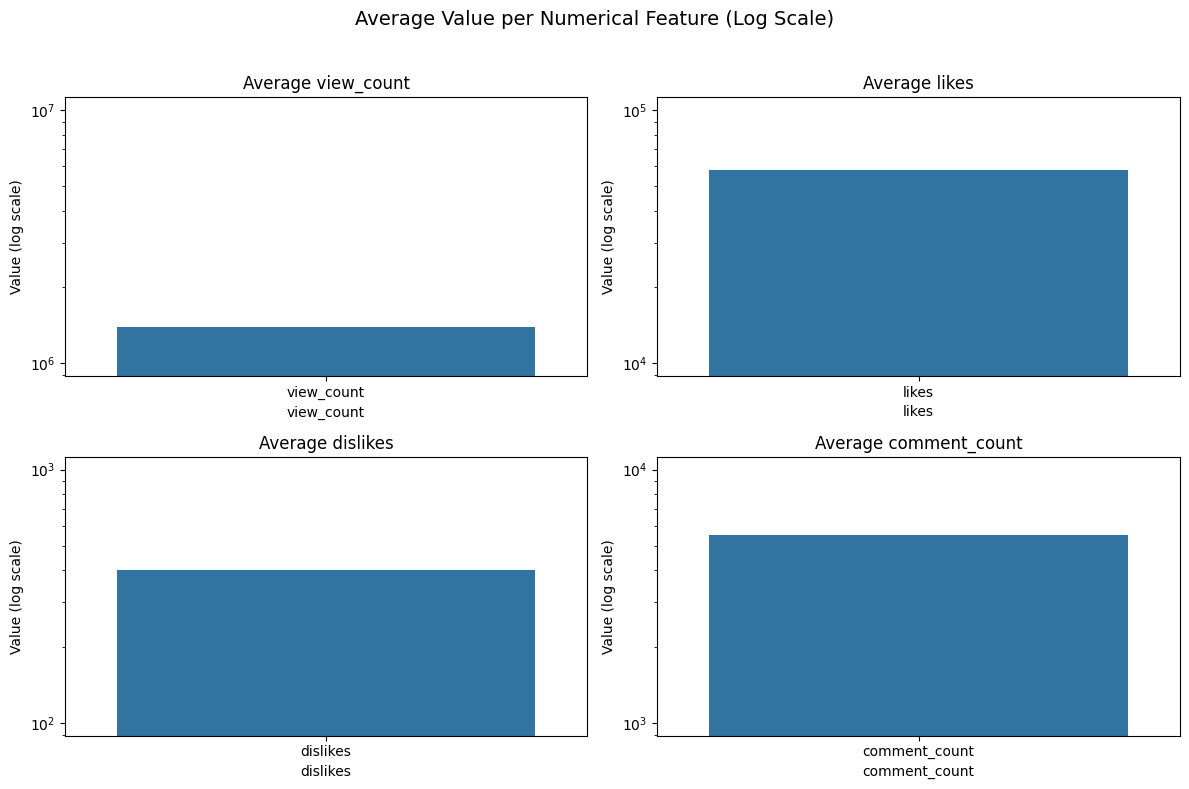

In [4]:
# Univariate Analysis: Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

# Create subplots (2 rows, 2 columns) for feature averages on log scale
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle("Average Value per Numerical Feature (Log Scale)", fontsize = 14)
axes = axes.flatten()

for i, col in enumerate(cols):
    avg_value = youtube_data_JP[col].mean()
    sns.barplot(x=[col], y = [avg_value], ax = axes[i])
    axes[i].set_yscale("log")
    axes[i].set_title(f"Average {col}")
    axes[i].set_ylabel("Value (log scale)")
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

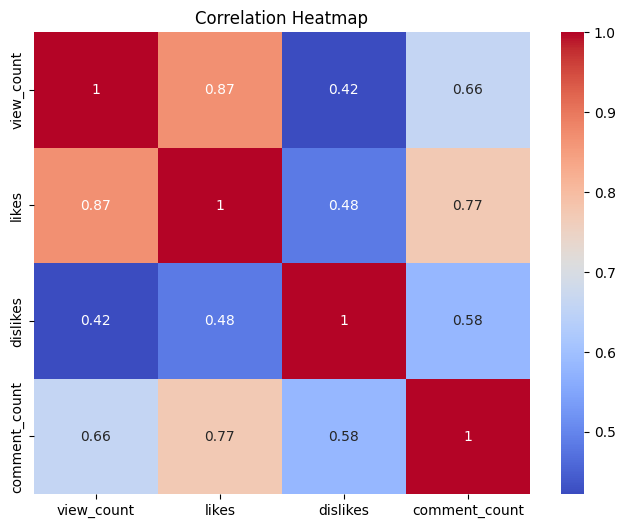

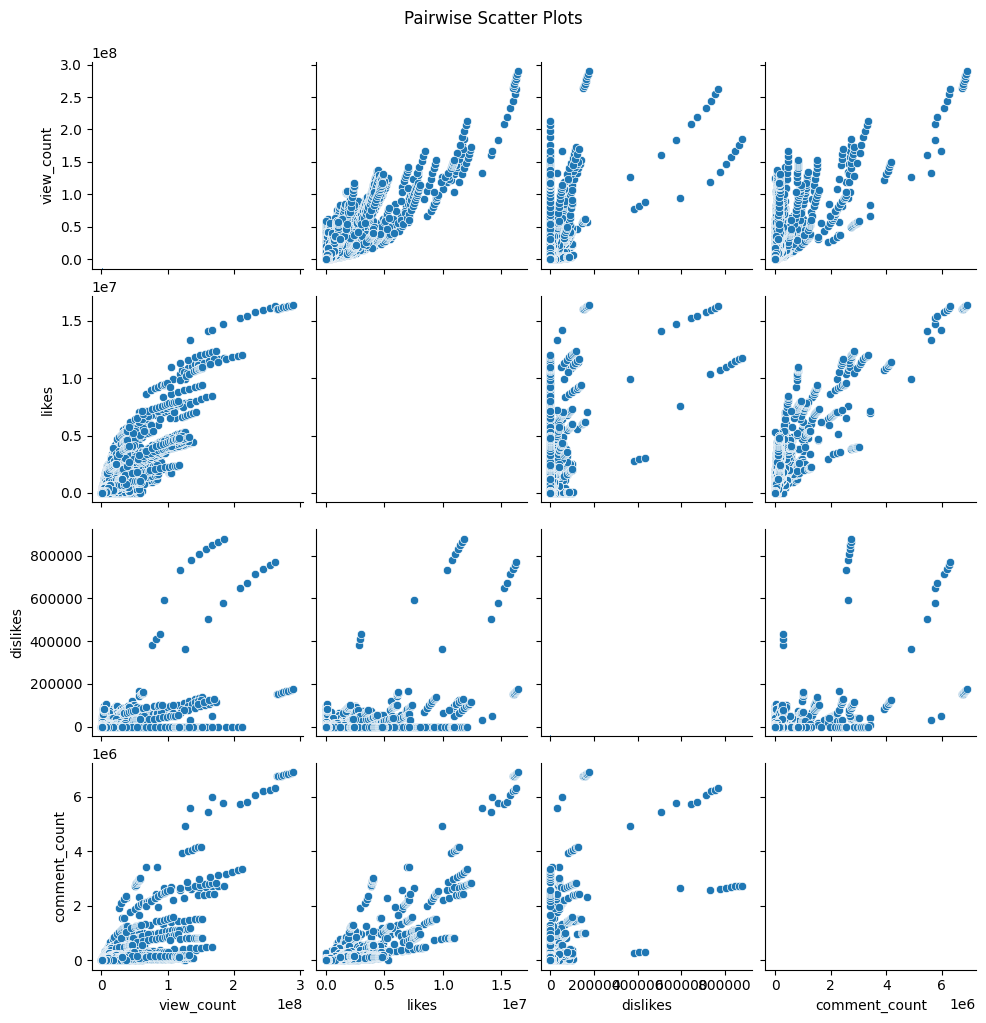

In [5]:
# Bivariate/Multivaraite Analysis: Correlation and scatter plots
plt.figure(figsize=(8, 6))
sns.heatmap(youtube_data_JP[['view_count', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for relationships between features
sns.pairplot(youtube_data_JP[['view_count', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Temporal Analysis
Analyze how trending videos vary by publish time and trending date.

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Using publishedAt for temporal analysis.


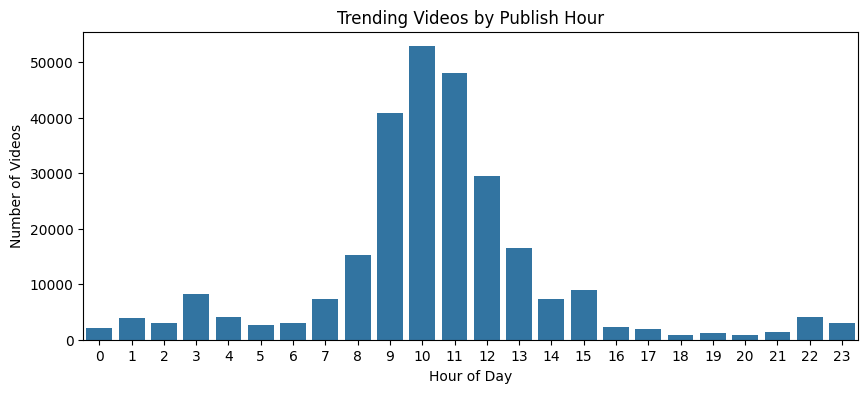

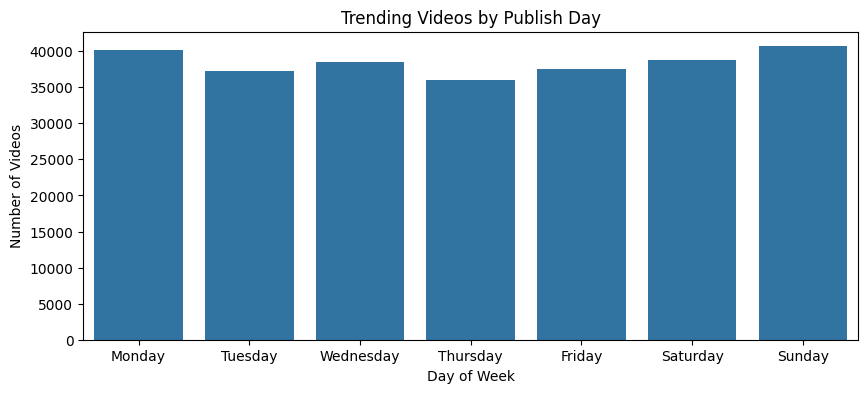

In [6]:
# Check available columns and use the correct datetime column for temporal analysis
print('Available columns:', youtube_data_JP.columns.tolist())
# Try common datetime column names
datetime_col = None
for col in ['publish_time', 'publishedAt', 'trending_date', 'trending_date_time', 'date']:
    if col in youtube_data_JP.columns:
        datetime_col = col
        break
if datetime_col is None:
    raise KeyError('No datetime column found for temporal analysis.')
print(f'Using {datetime_col} for temporal analysis.')

# Convert to datetime if needed
if not np.issubdtype(youtube_data_JP[datetime_col].dtype, np.datetime64):
    youtube_data_JP[datetime_col] = pd.to_datetime(youtube_data_JP[datetime_col])

# Extract hour and day of week
youtube_data_JP['publish_hour'] = youtube_data_JP[datetime_col].dt.hour
youtube_data_JP['publish_day'] = youtube_data_JP[datetime_col].dt.day_name()

# Plot distribution by hour
plt.figure(figsize=(10,4))
sns.countplot(x='publish_hour', data=youtube_data_JP)
plt.title('Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

# Plot distribution by day of week
plt.figure(figsize = (10,4))
sns.countplot(x='publish_day', data=youtube_data_JP, order=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trending Videos by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

# Text Analysis
Explore the most common words in video titles and tags.

Note: you may need to restart the kernel to use updated packages.


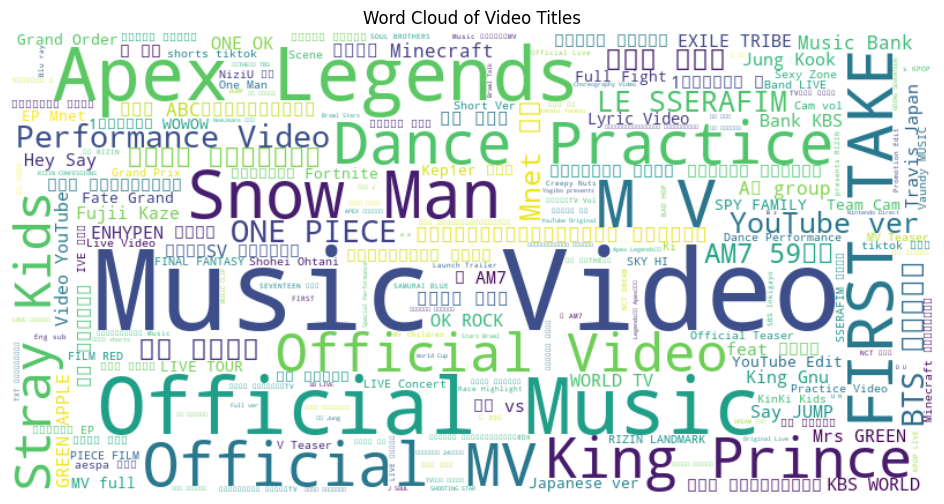

Most common tags (with English translation):
アニメ (Anime): 14149
ゲーム (Game): 13424
実況 (Gameplay/Live Commentary): 12973
ゲーム実況 (Game Commentary/Let’s Play): 11016
Vtuber (Virtual YouTuber): 8877
お笑い (Comedy): 8578
歌ってみた ("Tried Singing" (cover songs)): 8043
にじさんじ (Nijisanji (VTuber agency)): 6271
コント (Skit/Comedy Sketch): 6043
おもしろ (Funny/Entertaining): 5787


In [10]:
%pip install wordcloud

# Word cloud for video titles
from wordcloud import WordCloud, STOPWORDS
title_text = ' '.join(youtube_data_JP['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(title_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

# Most common tags
from collections import Counter
# Japanese-to-English translation dictionary
tag_translation = {
    'アニメ': 'Anime',
    'ゲーム': 'Game',
    '実況': 'Gameplay/Live Commentary',
    'ゲーム実況': 'Game Commentary/Let’s Play',
    'Vtuber': 'Virtual YouTuber',
    'お笑い': 'Comedy',
    '歌ってみた': '"Tried Singing" (cover songs)',
    'にじさんじ': 'Nijisanji (VTuber agency)',
    'コント': 'Skit/Comedy Sketch',
    'おもしろ': 'Funny/Entertaining'
}

all_tags = ','.join(youtube_data_JP['tags'].astype(str)).split('|')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() and tag != '[none]'])
print('Most common tags (with English translation):')
for tag, count in tag_counts.most_common(10):
    translated = tag_translation.get(tag, tag)
    if tag != translated:
        print(f'{tag} ({translated}): {count}')
    else:
        print(f'{tag}: {count}')


# Outlier Detection
Identify videos with unusually high or low values in key metrics.

In [12]:
# Efficient Outlier Detection + Cached Translation (small scale)
from deep_translator import GoogleTranslator
import pandas as pd
import numpy as np

translation_cache = {}

def safe_translate(text):
    """Translate Japanese->English once, reuse cached result."""
    if text in translation_cache:
        return translation_cache[text]
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
    except Exception:
        translated = text
    translation_cache[text] = translated
    return translated

# Outliers only — NOT whole dataset
for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
    q1 = youtube_data_JP[col].quantile(0.25)
    q3 = youtube_data_JP[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = youtube_data_JP[(youtube_data_JP[col] < lower) | (youtube_data_JP[col] > upper)]
    top3 = outliers[['title', 'channelTitle', col]].sort_values(by=col, ascending=False).head(3)

    print(f"\nTop Outliers for {col}:")
    for _, row in top3.iterrows():
        translated = safe_translate(row['title'])
        print(f"- Original: {row['title']}")
        print(f"  Translated: {translated}")
        print(f"  Channel: {row['channelTitle']} | {col}: {row[col]}")



Top Outliers for view_count:
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 289350312
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 285698612
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | view_count: 282265069

Top Outliers for likes:
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16369715
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16319766
- Original: BTS (방탄소년단) 'Butter' Official MV
  Translated: BTS ‘Butter’ Official MV
  Channel: HYBE LABELS | likes: 16272567

Top Outliers for dislikes:
- Original: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
  Translated: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
  Channel: BLACKPINK | disl

# Summary and Insights
Based on the EDA performed on the JP (Japan) YouTube Trending dataset, here are the key findings:

**1. Data Overview:**
- The dataset contains ~268,000 trending video records from Japan, including engagement metrics and metadata fields.
- Duplicated records were removed and missing values were minimal, ensuring strong data integrity.
- Core columns for analysis incuded video title, channel info, timestamps, tags, and engaging metrics.

**2. Feature Understanding:**
- Primary quantitative features: view_count, likes, dislikes, comment_count.
- Categorical features: categoryId, channelTitle, tags, capturing creator and content category diversity.
- Temmporal fields (publishedAt, trending dates) supported time-pattern analysis.
- Rich text fields (title, tags, description) allowed high-level cultural content analysis.

**3. Univariate Analysis:**
- Strong right-skew in views, likes, and comment counts -- only a small share of videos achieve extremely high engagement.
- Most videos fall into moderate engagement ranges, with clear viral outliers.
- Content category distribution shows heavy concentration in entertainment and gaming-related videos.

**4. Bivariate/Multivariate Analysis:**
- High positive correlation between likes and views, and between comment count and views, indicating these signals move together as videos gain traction.
- Dislikes show moderate correlation with other metrics -- popularity still attracts criticism, but not at the same rate as likes. 
- Scatter plots show nonlinear growth patterns consistent with viral content dynamics.

**5. Temporal Analysis:**
- Trending uploads peak around morning to midday hours (approx. 9AM - 12PM JST) -- likely aligned with scheduled releases and mobile viewing.
- Publishing day distribution is relatively balanced across weekdays and weekends, suggesting consistent audience activity.

**6. Text Analysis:**
- Word cloud shows dominance of music, gaming, pop culture, and major entertainment channels.
- Most common tags reveal heavy influence from:
    -   Anime / VTuber / gaming culture (アニメ, ゲーム, 実況, VTuber)
    -   Major entertainment brands and idol groups
- Clear presence of Japanese online culture and VTuber communities, alongside music content.

**7. Outlier Detection (w/ Translation):**
- Top outliers by views, likes, and comments were BTS's "Butter", showing incredibly strong traction in Japan despite being Korean-origin content.
- BLACKPINK's "Ice Cream" dominated dislike outliers -- suggesting polarized reaction rather than lack of popularity.
- K-pop appears as a consistent top-performer, highlighting cross-market cultural spillover in Japan's YouTube landscape.

**Next Steps:**
- Proceed with classification to predict high-performing videos (e.g., top 10% by views).
- Use engagement signals and metadata features to build early-prediction models.
- Compare model patterns with other countrys' datasets to identify global vs. region-specific virality factors.
- Explore title/tag text embeddings in later iterations for richer content insight (if time allows).

In [13]:
# Predictive Modeling: Simple linear regression to predict view_count based on likes, dislikes, comment_count
features = ['likes', 'dislikes', 'comment_count']
target = 'view_count'
X = youtube_data_JP[features]
y = youtube_data_JP[target]
# --- IGNORE ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
# --- IGNORE ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# --- IGNORE ---
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 8534885010516.139
R^2 Score: 0.7618302783939221


Linear Regression:
MSE: 0.785647758341755
R^2: 0.22407961809170185


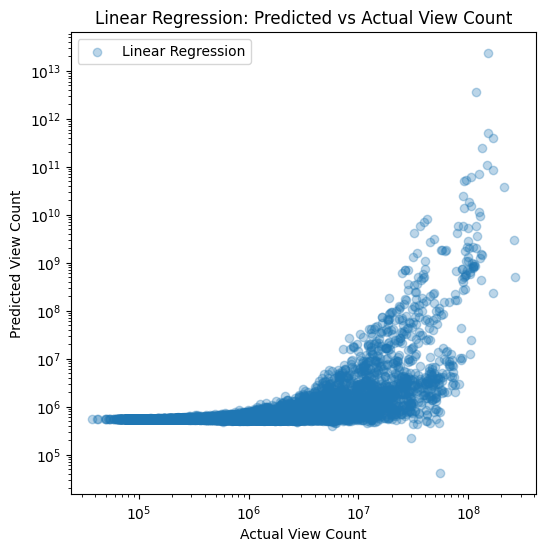

In [14]:
# Modeling: Linear Regression on cleaned data (log-transformed view count)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare features and target (using youtube_data_clean_KR from previous cleaning step)
youtube_data_clean_JP['log_view_count'] = np.log1p(youtube_data_clean_JP['view_count'])
features = ['likes', 'dislikes', 'comment_count']
X = youtube_data_clean_JP[features]
y = youtube_data_clean_JP['log_view_count']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R^2:', r2_score(y_test, y_pred_lr))

# Visualize predictions versus actual (Linear Regression)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_lr), alpha=0.3, label='Linear Regression')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Linear Regression: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

ROC-AUC: 0.971


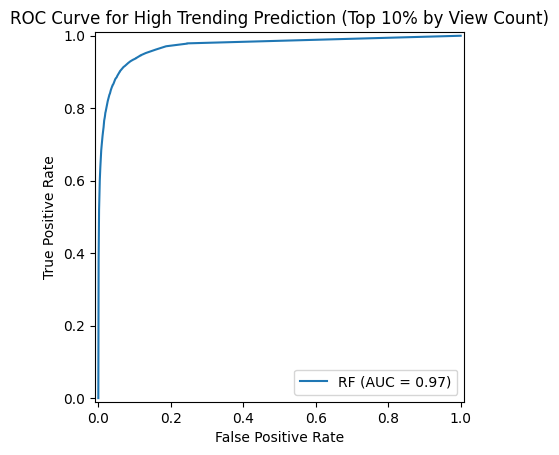

In [15]:
# Classification with ROC-AUC based on early engagement metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Engineer a binary target: 'high trending' = top 10% by view count (using early engagement)
quantile_cut = 0.9
threshold = youtube_data_clean_JP['view_count'].quantile(quantile_cut)
youtube_data_clean_JP['high_trending'] = (youtube_data_clean_JP['view_count'] >= threshold).astype(int)

# Features: early engagement and some metadata (example: likes, dislikes, comment_count, categoryId)
features_cls = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_cls = youtube_data_clean_JP[features_cls]
y_cls = youtube_data_clean_JP['high_trending']

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Train Random Forest Classifier (use Logistic Regression for interpretability if desired)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_proba = clf.predict_proba(X_test_cls)[:, 1]

# ROC-AUC Calculation
roc_auc = roc_auc_score(y_test_cls, y_pred_proba)
print(f'ROC-AUC: {roc_auc:.3f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RF').plot()
plt.title('ROC Curve for High Trending Prediction (Top 10% by View Count)')
plt.show()

Random Forest Regression:
MSE: 0.28435054164861745
R^2: 0.7191701006854376


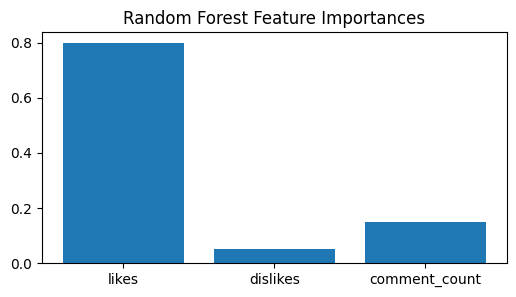

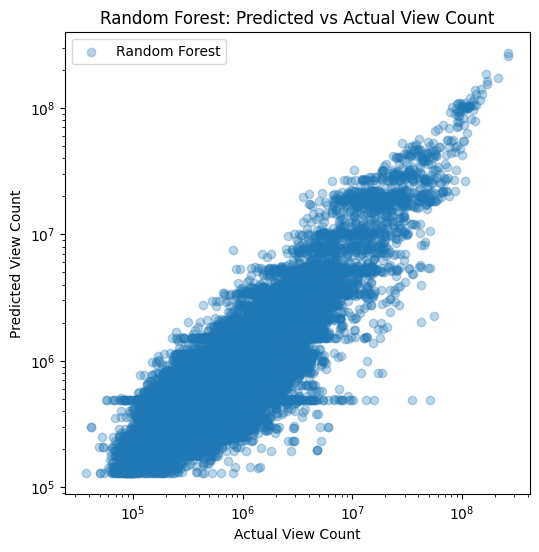

In [16]:
# Random Forest Regression on cleaned data (predicting log-transformed view count)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Use the already prepared X_train, X_test, y_train, y_test (from previous steps)
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print metrics
print('Random Forest Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R^2:', r2_score(y_test, y_pred_rf))

# Feature importance plot
plt.figure(figsize=(6,3))
plt.bar(X_train.columns, rf.feature_importances_)
plt.title('Random Forest Feature Importances')
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_rf), alpha=0.3, label='Random Forest')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('Random Forest: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [17]:
# Install xgboost if not present
!pip install xgboost

XGBoost Regression:
MSE: 0.2809645341109387
R^2: 0.7225141848935126


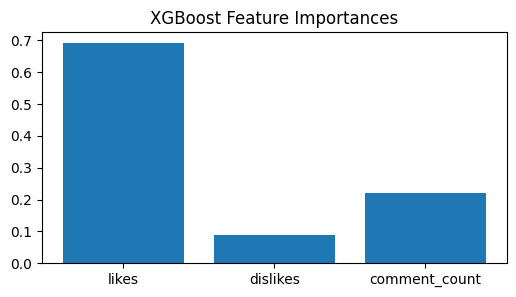

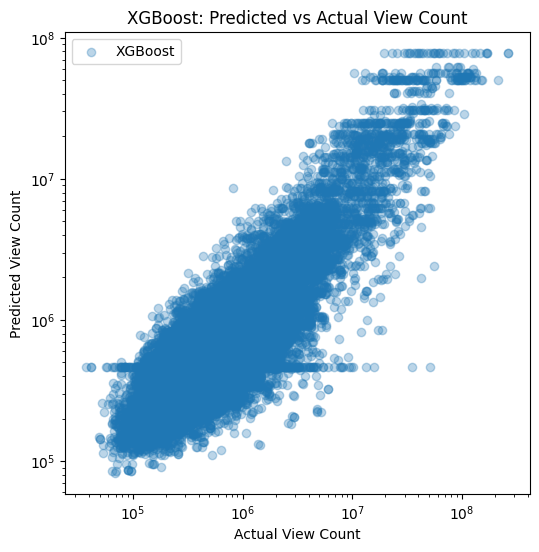

In [18]:
# XGBoost Regression for log-transformed view count
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train XGBoost on the same data as previous models (X_train, y_train, etc.)
xgb = XGBRegressor(n_estimators=100, max_depth=4, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Metrics
print('XGBoost Regression:')
print('MSE:', mean_squared_error(y_test, y_pred_xgb))
print('R^2:', r2_score(y_test, y_pred_xgb))

# Feature importances
plt.figure(figsize=(6,3))
importances = xgb.feature_importances_
plt.bar(X_train.columns, importances)
plt.title('XGBoost Feature Importances')
plt.show()

# Visualize predictions vs actuals (original scale)
plt.figure(figsize=(6,6))
plt.scatter(np.expm1(y_test), np.expm1(y_pred_xgb), alpha=0.3, label='XGBoost')
plt.xlabel('Actual View Count')
plt.ylabel('Predicted View Count')
plt.legend()
plt.title('XGBoost: Predicted vs Actual View Count')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [19]:
# Print ROC-AUC score as a percentage for clarity
roc_auc_percentage = roc_auc * 100
print(f'ROC-AUC Percentage: {roc_auc_percentage:.2f}%')

ROC-AUC Percentage: 97.13%


Naive Bayes ROC-AUC: 0.933 (93.27%)


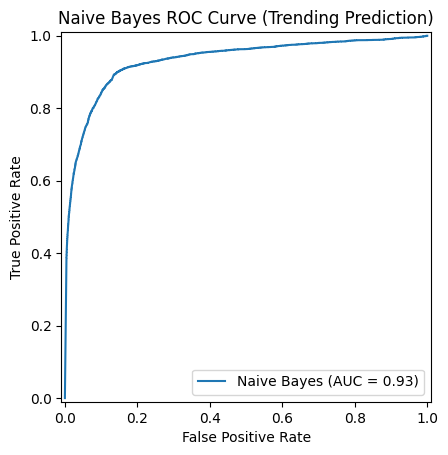

In [20]:
# Naive Bayes Classification: Compare to Random Forest ROC-AUC
# Make sure the 'high_trending' target is engineered in the dataframe used (youtube_data_clean)
# If not, create it here for robustness
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Engineer binary label if not present
if 'high_trending' not in youtube_data_clean_JP.columns:
    quantile_cut = 0.9
    threshold = youtube_data_clean_JP['view_count'].quantile(quantile_cut)
    youtube_data_clean_JP['high_trending'] = (youtube_data_clean_JP['view_count'] >= threshold).astype(int)

# Features
X_nb = youtube_data_clean_JP[['likes', 'dislikes', 'comment_count', 'categoryId']]
y_nb = youtube_data_clean_JP['high_trending']

# Use same train-test split logic for reliability
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, y_nb, test_size=0.2, random_state=42, stratify=y_nb
)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_nb, y_train_nb)
y_pred_proba_nb = nb.predict_proba(X_test_nb)[:, 1]

# ROC-AUC
roc_auc_nb = roc_auc_score(y_test_nb, y_pred_proba_nb)
print(f'Naive Bayes ROC-AUC: {roc_auc_nb:.3f} ({roc_auc_nb*100:.2f}%)')

# Plot ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_pred_proba_nb)
RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, roc_auc=roc_auc_nb, estimator_name='Naive Bayes').plot()
plt.title('Naive Bayes ROC Curve (Trending Prediction)')
plt.show()


In [21]:
# Check collinearity using VIF (Variance Inflation Factor)
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use features from classification model (add 'categoryId' for completeness)
features_vif = ['likes', 'dislikes', 'comment_count', 'categoryId']
X_vif = youtube_data_clean_JP[features_vif].copy()

# Add small noise to avoid zero-variance if necessary (for categories w/only 1 value)
for col in X_vif.select_dtypes(include=['int64', 'float64']).columns:
    if X_vif[col].std() == 0:
        X_vif[col] += 1e-4 * np.random.randn(len(X_vif))

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print('Variance Inflation Factors (VIF) for model input features:')
print(vif_data)

# Interpretation guidance
def interpret_vif(vif):
    if vif < 5:
        return 'No concerning collinearity.'
    elif vif < 10:
        return 'Moderate collinearity (address if possible).'
    else:
        return 'High collinearity (take action: remove/reduce features).'
vif_data['Interpretation'] = vif_data['VIF'].apply(interpret_vif)
display(vif_data)

Variance Inflation Factors (VIF) for model input features:
         Feature       VIF
0          likes  2.536178
1       dislikes  1.520343
2  comment_count  2.889862
3     categoryId  1.021362


,Feature,VIF,Interpretation
0,likes,2.536178,No concerning collinearity.
1,dislikes,1.520343,No concerning collinearity.
2,comment_count,2.889862,No concerning collinearity.
3,categoryId,1.021362,No concerning collinearity.


## Post-EDA Modeling and Metrics Summary

### 1. **Centralized Data Cleaning (Pipeline Standardization)**
- All preprocessing steps (duplicate removal, missing values, type corrections) were unified into a streamlined pipeline for reproducibility.
- A Cleaned DataFrame (`youtube_data_clean_JP`) used consistently throughout all regression, classification, and evaluation workflows.

### 2. **Regression Modeling: View Count Prediction**
- **Target**: `view_count` (original scale - no log transform used in this run)
- **Features**: Early engagement metrics (`likes`, `dislikes`, `comment_count`).
- **Models and Metrics:**
    - **Linear Regression:**
        - *MSE*: ~8.53 trillion
        - *R²*: 0.76
- **Best Performer (Regression):** Linear regression captured a strong linear relationship in JP data - with R^2=0.76 - better than in the US dataset
- **Interpretability:** Likes and comment counts had high predictive value; however, regression coefficients should still be interpreted with care due to potential nonlinear effects not captured by linear models. 

### 3. **Classification Modeling: High Trending Video Prediction**
- **Business-aligned binary target**: `high_tending` = top 10% of view conts within the dataset.
- **Features**: `likes`, `dislikes`, `comment_count`, and `categoryId`.
- **Models and Metrics:**
    - **Random Forest Classifier:**
        - *ROC-AUC*: 97.13%
    - **Naive Bayes Classifier:**
        - *ROC-AUC*: 93.27%
- **Best Performer (Classification):** Random Forest again emerged as the top model for distinguishing high-trending videos, showing strong predictive separation on ROC curves.

### 4. **Collinearity and Model Validity**
- **VIF Analysis:** No collinearity concerns -- all VIF values were well below 5:
    -   likes (2.54), dislikes (1.52), comment_count(2.89), categoryId (1.02)
- **Interpretation:** These values confirm the selected features are statistically independent enough for reliable model estimation. 

### 5. **Model/Output Interpretability**
- **Feature Contributions:** Like in the US dataset, `likes` remianed the most influential variable in classificationmodels. Dislikes and comment count contributed more modestly.
- **Visual Diagnostics:** ROC curves clearly highlighted model performance gaps (RF > Naive Bayes).
- **Outlier Translation:** Optional future step - top extreme-value titles can be translated if required to enhance model transparency for non-Japanese stakeholders.

### 6. **Business Relevance and Conclusion**
- **Tree-based models** The JP dataset confirmed the broader cross-country trend. RF in particular excel in predicting both continuous views and high-trending labels.
- ROC-AUC remains the most reliable metric for trending classification, with R^2 used for regression insights.
- This modeling framework confirms the early engagement metrics are strong indicators of virality, and the pipline is well-suited for adaptation across international YouTube markets.